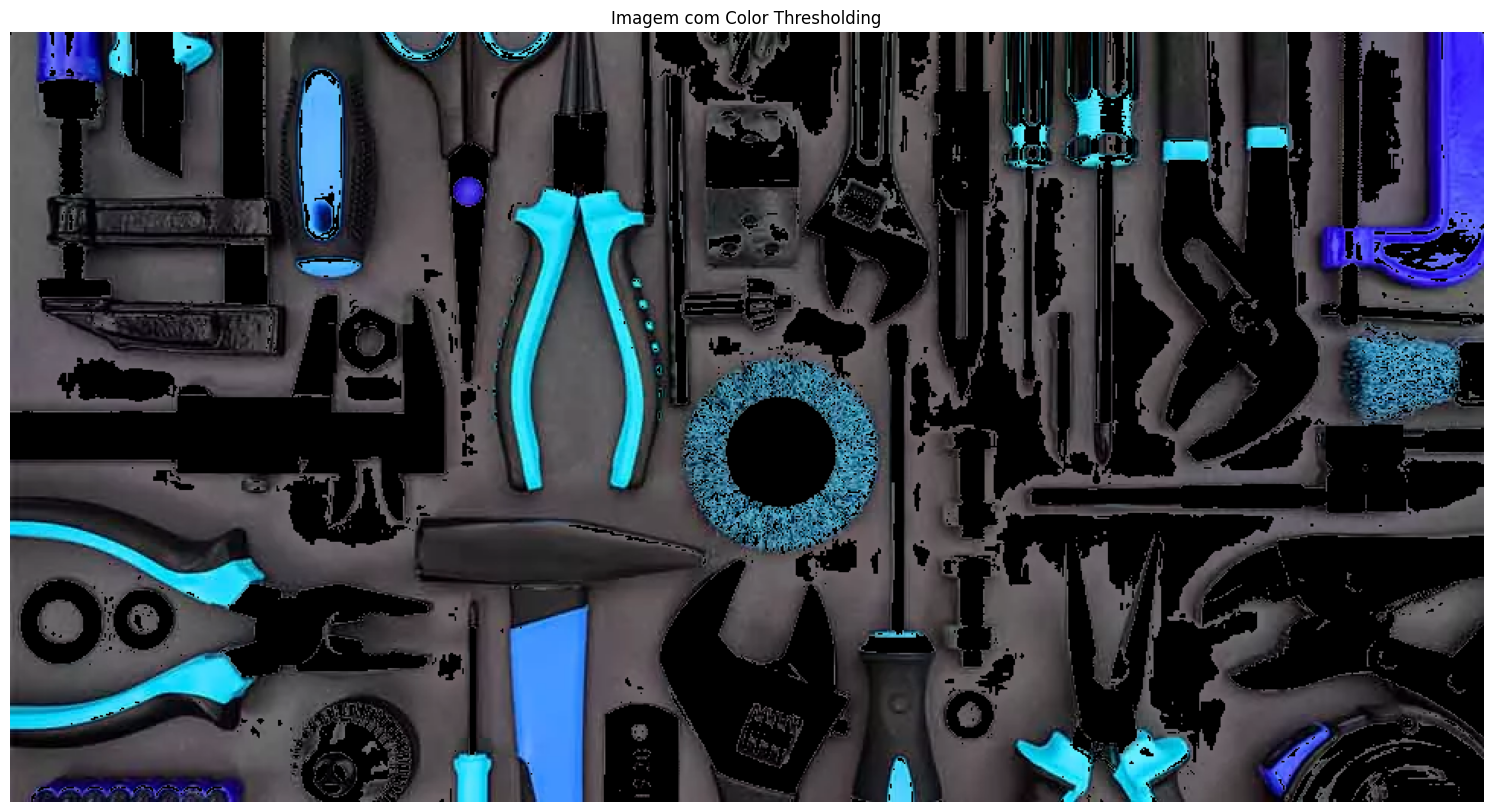

In [1]:
# Importar as bibliotecas necessárias
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem TIFF em formato RGB
img_path = 'images/Image_01TMA10_03.vsi.tif'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Verificar as dimensões da imagem para garantir que seja RGB
if len(image.shape) == 2:  # Caso seja grayscale, converter para RGB
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Definir os limites para o color thresholding (R, G, B)
lower_bound = np.array([0, 0, 0])   # Limite inferior: R=0, G=0, B=0
upper_bound = np.array([255, 255, 110])  # Limite superior: R=255, G=255, B=110

# Aplicar o threshold usando cv2.inRange para filtrar a cor
mask = cv2.inRange(image, lower_bound, upper_bound)

# Aplicar a máscara para manter as cores dentro dos limites
result = cv2.bitwise_and(image, image, mask=mask)

# Exibir a imagem original e a imagem com o threshold aplicado
plt.figure(figsize=(20, 10))

# Mostrar a imagem com o threshold aplicado

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Imagem com Color Thresholding')
plt.axis('off')

plt.show()


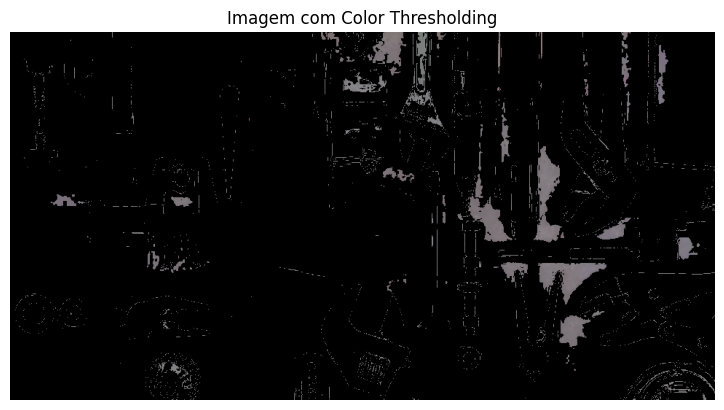

In [2]:
# Importar as bibliotecas necessárias AZUL
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem TIFF em formato RGB
img_path = 'images/TMA1_09.vsi - Series #1 at (592, 960).tif'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Verificar as dimensões da imagem para garantir que seja RGB
if len(image.shape) == 2:  # Caso seja grayscale, converter para RGB
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Definir os limites para o color thresholding (R, G, B)
lower_bound = np.array([0, 0, 120])   # Limite inferior: R=0, G=0, B=0
upper_bound = np.array([140, 140, 255])  # Limite superior: R=255, G=255, B=110

# Aplicar o threshold usando cv2.inRange para filtrar a cor
mask = cv2.inRange(image, lower_bound, upper_bound)

# Aplicar a máscara para manter as cores dentro dos limites
result = cv2.bitwise_and(image, image, mask=mask)

# Exibir a imagem original e a imagem com o threshold aplicado
plt.figure(figsize=(20, 10))

# Mostrar a imagem com o threshold aplicado
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Imagem com Color Thresholding')
plt.axis('off')

plt.show()


Cells in the image with size and circularity criteria:  1767


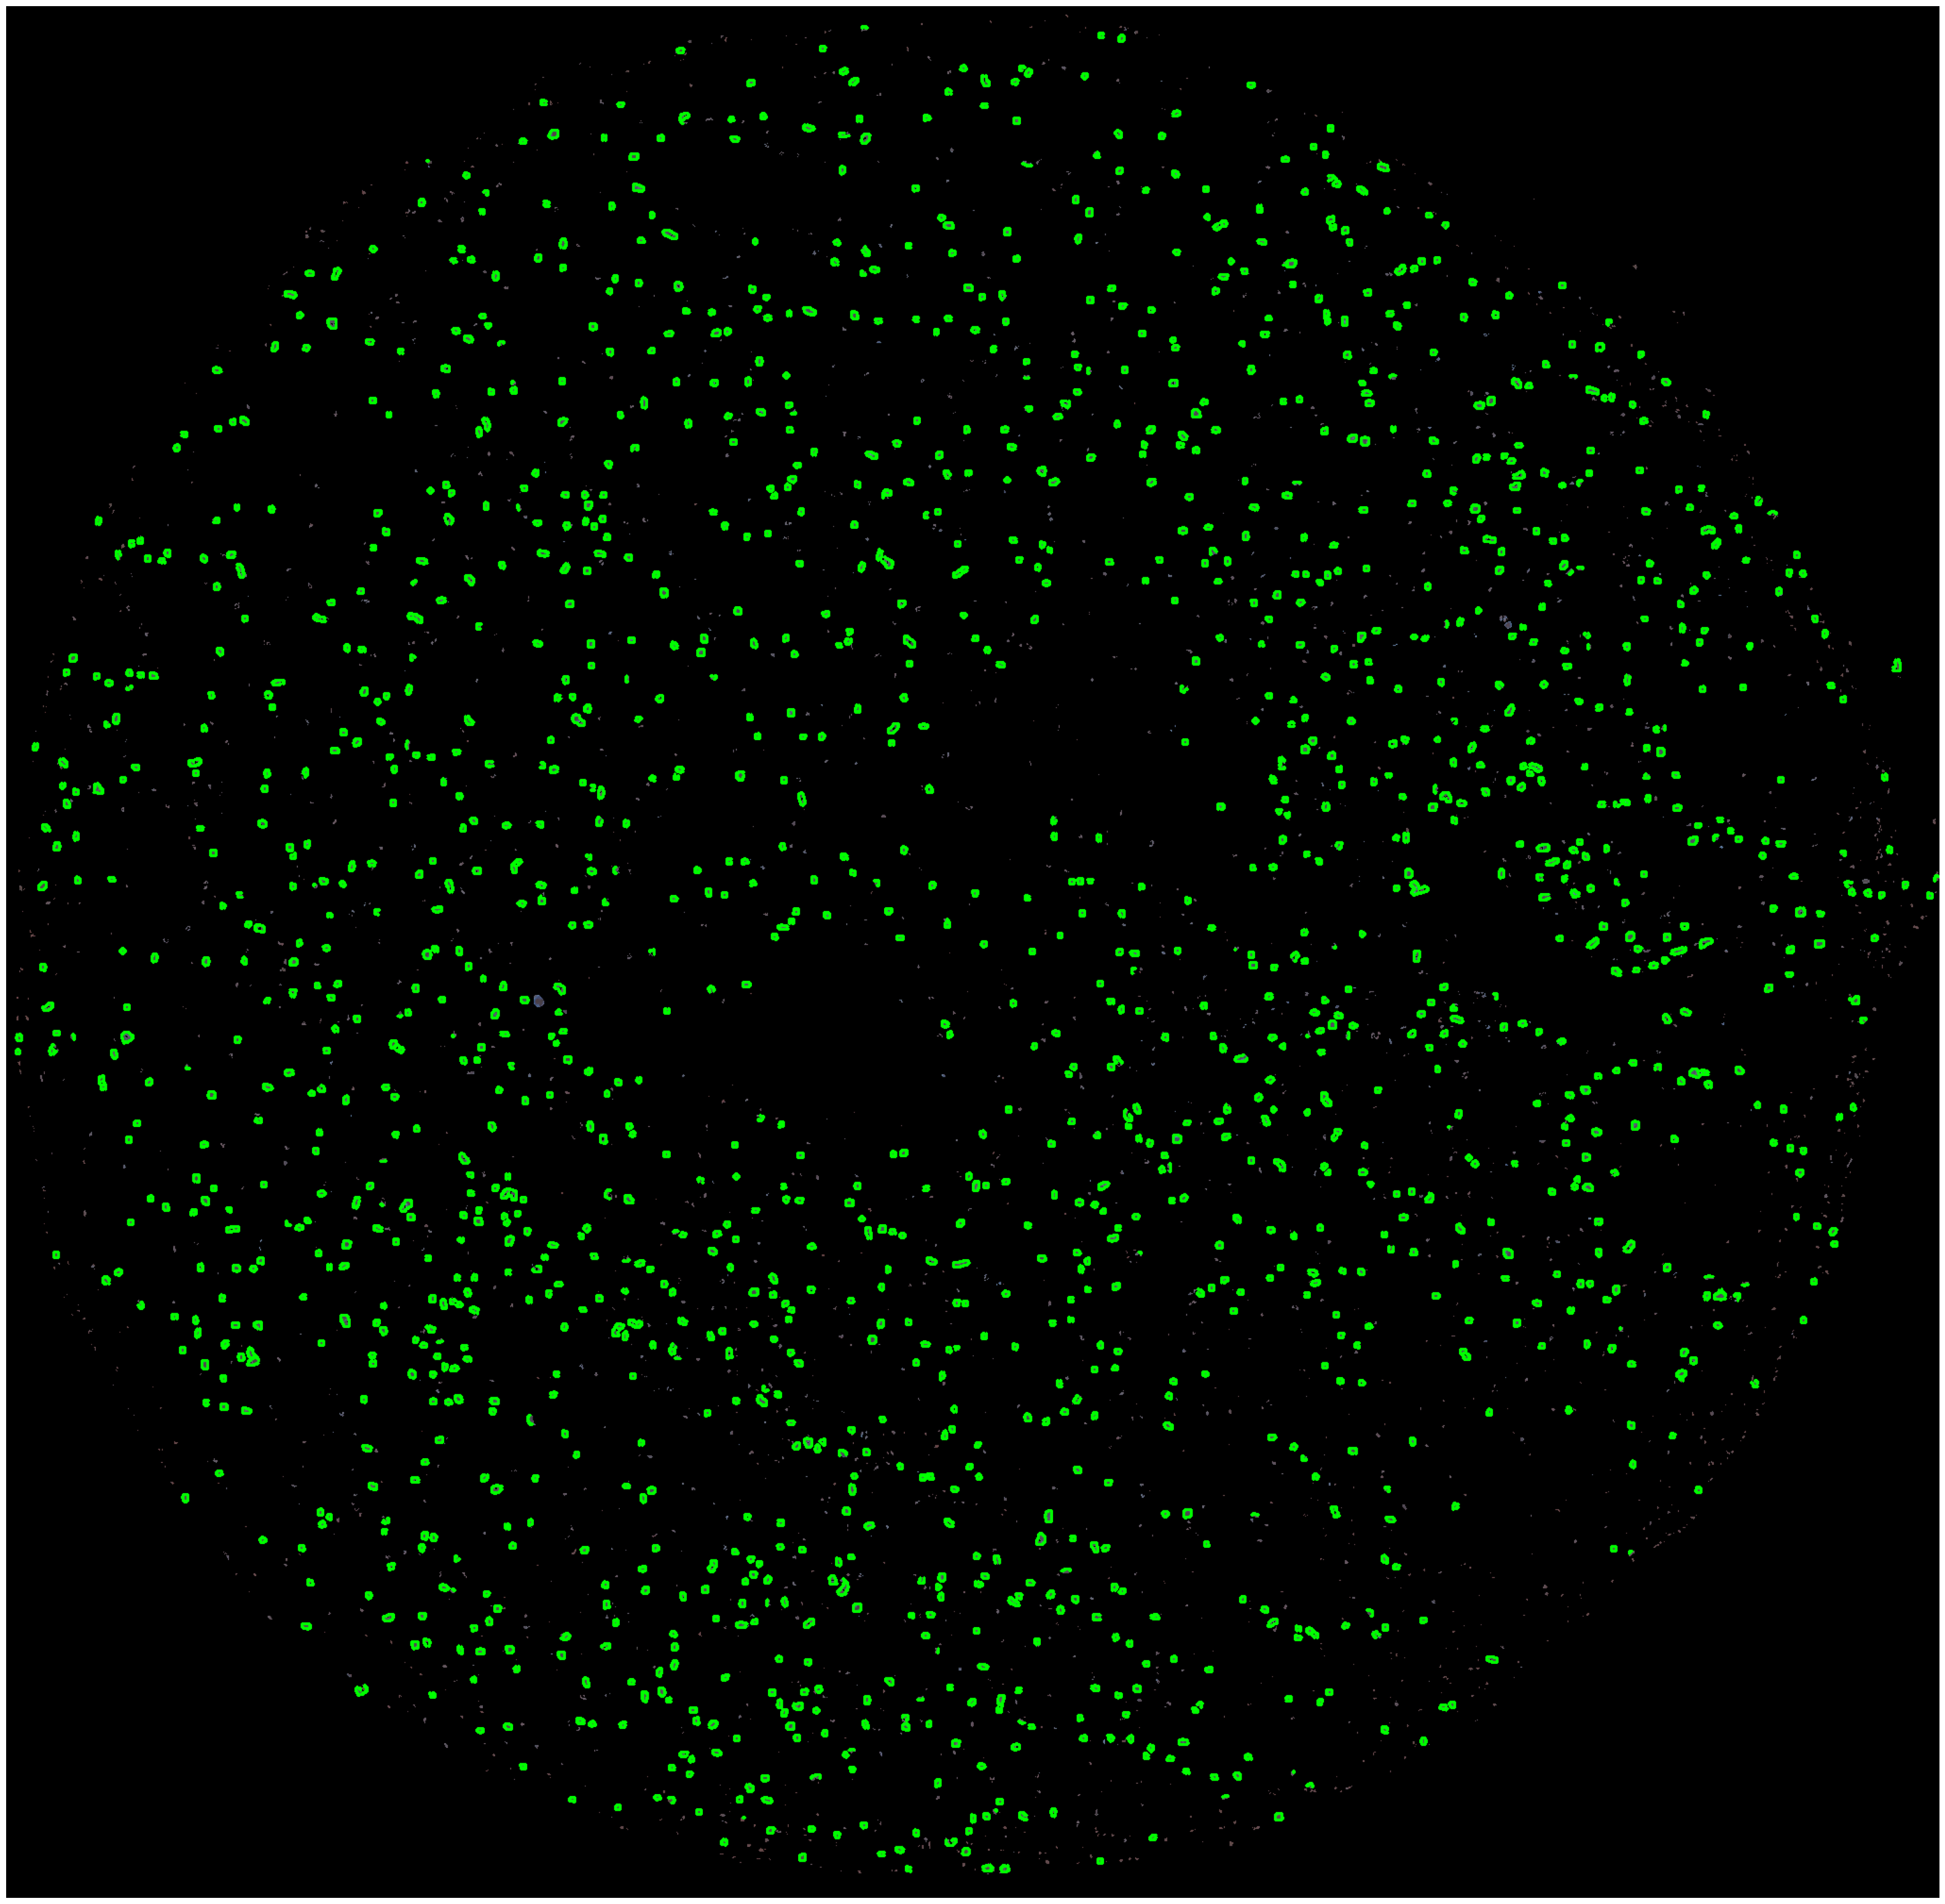

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Converter a imagem para escala de cinza
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Aplicar desfoque gaussiano
blur = cv2.GaussianBlur(gray, (11, 11), 0)

# Aplicar o detector de bordas Canny
canny = cv2.Canny(blur, 75, 100, apertureSize=3)

# Dilatar as bordas para conectar regiões
dilated = cv2.dilate(canny, (1, 1), iterations=0)

# Encontrar os contornos na imagem dilatada
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Parâmetros para o filtro de tamanho (em pixels)
min_area = 0  # Tamanho mínimo para uma célula (ajustado para marrons)
max_area = 100  # Tamanho máximo para uma célula (ajustado para azuis)
min_circularity = 0.01 # Circularidade mínima (1 = círculo perfeito)

# Filtrar contornos com base no tamanho e circularidadea
filtered_contours = []
for contour in cnt:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)  # True para contornos fechados
    
    if perimeter > 0:  # Prevenir divisão por zero
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        
        # Aplicar filtros de área e circularidade
        if min_area <= area <= max_area and circularity >= min_circularity:
            filtered_contours.append(contour)

# Desenhar os contornos filtrados na imagem original
rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, filtered_contours, -1, (0, 255, 0), 2)

# Exibir a imagem original com os contornos desenhados
plt.figure(figsize=(60, 40))
plt.imshow(rgb)
plt.axis('off')

# Contar e imprimir o número de células dentro do intervalo de tamanho e circularidade
print("Cells in the image with size and circularity criteria: ", len(filtered_contours))
